In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cancer-death-rates-by-type.csv to cancer-death-rates-by-type (1).csv


In [ ]:
cancer_data = pd.read_csv('cancer-death-rates-by-type.csv')

In [ ]:
cancer_data.head()

,Entity,Code,Year,Deaths - Prostate cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Breast cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Uterine cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Bladder cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Cervical cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Kidney cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Stomach cancer - Sex: Both - Age: Age-standardized (Rate),...,Deaths - Pancreatic cancer - Sex: Both - Age: Age-standardized (Rate),"Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: Age-standardized (Rate)",Deaths - Lip and oral cavity cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Colon and rectum cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Gallbladder and biliary tract cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Liver cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Larynx cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Ovarian cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Thyroid cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Brain and central nervous system cancer - Sex: Both - Age: Age-standardized (Rate)
0,Afghanistan,AFG,1990,6.486764,7.310613,0.837238,4.285153,4.479875,0.826029,31.988172,...,1.995093,14.069657,1.273888,7.874312,2.611981,11.971836,3.621251,1.045087,0.795176,4.512770
1,Afghanistan,AFG,1991,6.466813,7.288994,0.829514,4.233850,4.468688,0.804741,31.853999,...,1.951962,13.805590,1.257040,7.754987,2.590045,11.900918,3.589414,1.035561,0.789659,4.446988
2,Afghanistan,AFG,1992,6.466158,7.299131,0.821847,4.192670,4.465265,0.785397,31.785219,...,1.906444,13.591141,1.244526,7.652136,2.573065,11.841933,3.570433,1.025213,0.784548,4.413799
3,Afghanistan,AFG,1993,6.479348,7.381653,0.822471,4.166575,4.518657,0.777856,32.059246,...,1.888143,13.422799,1.240243,7.555002,2.578325,11.865807,3.593340,1.023647,0.788610,4.440347
4,Afghanistan,AFG,1994,6.477914,7.473144,0.827221,4.140383,4.600542,0.772456,32.504461,...,1.876670,13.250556,1.236967,7.429222,2.593368,11.919348,3.632985,1.027381,0.796990,4.471324


In [ ]:
cancer_data.shape

(6840, 25)

In [ ]:
cancer_data.tail()

,Entity,Code,Year,Deaths - Prostate cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Breast cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Uterine cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Bladder cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Cervical cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Kidney cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Stomach cancer - Sex: Both - Age: Age-standardized (Rate),...,Deaths - Pancreatic cancer - Sex: Both - Age: Age-standardized (Rate),"Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: Age-standardized (Rate)",Deaths - Lip and oral cavity cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Colon and rectum cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Gallbladder and biliary tract cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Liver cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Larynx cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Ovarian cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Thyroid cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Brain and central nervous system cancer - Sex: Both - Age: Age-standardized (Rate)
6835,Zimbabwe,ZWE,2015,22.831973,15.883617,3.300149,8.831272,19.377114,0.899880,14.420835,...,7.414832,14.843994,2.245946,12.663915,1.552107,14.724376,2.288849,4.037035,1.057744,1.137686
6836,Zimbabwe,ZWE,2016,22.867772,15.916682,3.305405,8.785333,19.077268,0.911042,14.256907,...,7.596111,14.913561,2.256949,12.757695,1.543263,14.568177,2.281767,4.133996,1.053995,1.151176
6837,Zimbabwe,ZWE,2017,22.867600,15.898045,3.297913,8.758682,18.709469,0.919663,14.070959,...,7.761276,14.945508,2.262002,12.816489,1.530004,14.379683,2.269442,4.227000,1.047349,1.155454
6838,Zimbabwe,ZWE,2018,22.935194,15.870073,3.284356,8.742797,18.348405,0.926283,13.872298,...,7.931705,15.013534,2.267882,12.879943,1.517075,14.195411,2.260020,4.314312,1.039137,1.159539
6839,Zimbabwe,ZWE,2019,22.939215,15.839594,3.280125,8.734302,18.092448,0.931166,13.731391,...,8.063224,15.059629,2.272438,12.925329,1.508796,14.030374,2.253802,4.364899,1.034256,1.161499


In [ ]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 25 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   Entity                                                                                       6840 non-null   object 
 1   Code                                                                                         6150 non-null   object 
 2   Year                                                                                         6840 non-null   int64  
 3   Deaths - Prostate cancer - Sex: Both - Age: Age-standardized (Rate)                          6840 non-null   float64
 4   Deaths - Breast cancer - Sex: Both - Age: Age-standardized (Rate)                            6840 non-null   float64
 5   Deaths - Uterine cancer - Sex: Bot

In [ ]:
cancer_data.isnull().sum()

,0
Entity,0
Code,690
Year,0
Deaths - Prostate cancer - Sex: Both - Age: Age-standardized (Rate),0
Deaths - Breast cancer - Sex: Both - Age: Age-standardized (Rate),0
Deaths - Uterine cancer - Sex: Both - Age: Age-standardized (Rate),0
Deaths - Bladder cancer - Sex: Both - Age: Age-standardized (Rate),0
Deaths - Cervical cancer - Sex: Both - Age: Age-standardized (Rate),0
Deaths - Kidney cancer - Sex: Both - Age: Age-standardized (Rate),0
Deaths - Stomach cancer - Sex: Both - Age: Age-standardized (Rate),0


In [ ]:
cencer_data = cancer_data.drop(columns=['Code', 'Entity', 'Year'], errors='ignore')

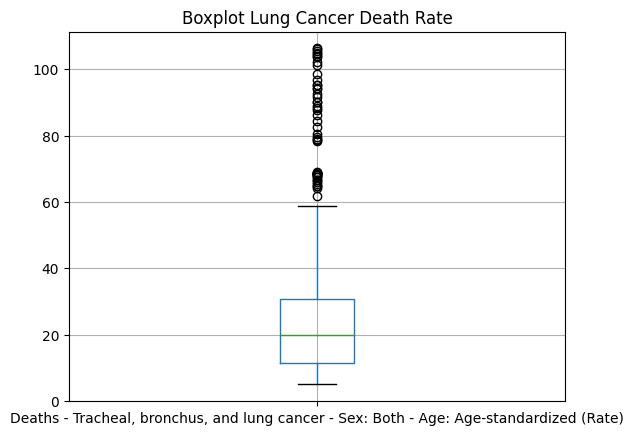

In [ ]:
cencer_data.boxplot(column=['Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: Age-standardized (Rate)'])
plt.title("Boxplot Lung Cancer Death Rate")
plt.show()

In [ ]:
cancer_data['Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: Age-standardized (Rate)'] = \
cancer_data['Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: Age-standardized (Rate)'].fillna(
cancer_data['Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: Age-standardized (Rate)'].median()
)


In [ ]:
cancer_data.isnull().sum()

,0
Entity,0
Code,690
Year,0
Deaths - Prostate cancer - Sex: Both - Age: Age-standardized (Rate),0
Deaths - Breast cancer - Sex: Both - Age: Age-standardized (Rate),0
Deaths - Uterine cancer - Sex: Both - Age: Age-standardized (Rate),0
Deaths - Bladder cancer - Sex: Both - Age: Age-standardized (Rate),0
Deaths - Cervical cancer - Sex: Both - Age: Age-standardized (Rate),0
Deaths - Kidney cancer - Sex: Both - Age: Age-standardized (Rate),0
Deaths - Stomach cancer - Sex: Both - Age: Age-standardized (Rate),0


In [ ]:
cancer_data = cancer_data.dropna(subset=['Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: Age-standardized (Rate)'])

In [ ]:
cancer_data.describe()

,Year,Deaths - Prostate cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Breast cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Uterine cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Bladder cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Cervical cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Kidney cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Stomach cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Nasopharynx cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Testicular cancer - Sex: Both - Age: Age-standardized (Rate),...,Deaths - Pancreatic cancer - Sex: Both - Age: Age-standardized (Rate),"Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: Age-standardized (Rate)",Deaths - Lip and oral cavity cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Colon and rectum cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Gallbladder and biliary tract cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Liver cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Larynx cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Ovarian cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Thyroid cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Brain and central nervous system cancer - Sex: Both - Age: Age-standardized (Rate)
count,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,...,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000
mean,2004.500000,10.971163,11.143419,1.644222,3.409531,6.709214,1.995704,13.280728,0.786961,0.182764,...,5.608428,22.173528,2.298132,13.299952,2.005945,6.068874,1.794140,2.546739,0.647703,2.848689
std,8.656074,7.014076,4.088111,0.839118,1.743983,5.349751,1.352481,7.512916,0.849610,0.471489,...,3.126273,12.761113,1.748646,6.222012,1.465439,8.166863,0.999805,1.363066,0.314023,1.621098
min,1990.000000,2.379564,3.537498,0.254159,0.956632,0.704535,0.391774,3.366431,0.098910,0.004655,...,1.125122,4.989768,0.560950,3.621139,0.472734,0.645518,0.311429,0.411474,0.036908,0.275093
25%,1997.000000,6.145465,8.032752,1.079400,2.138188,2.387952,0.913365,8.340951,0.279183,0.071915,...,3.013604,11.435857,1.358004,8.171004,1.190599,2.796301,1.086698,1.490251,0.468990,1.528188
50%,2004.500000,9.717744,10.577197,1.491446,3.010245,5.072539,1.520193,11.572570,0.456909,0.109337,...,4.898176,19.916431,1.891091,12.020281,1.522508,3.886513,1.511636,2.189832,0.594872,2.364289
75%,2012.000000,13.122989,13.717871,2.016718,4.374833,10.212799,2.881694,16.270615,1.018311,0.190325,...,8.058965,30.650051,2.624696,17.190284,2.388356,6.615555,2.317227,3.505195,0.758053,3.992705
max,2019.000000,54.152931,39.243064,6.626412,12.240190,46.158034,7.998508,75.409475,9.633689,7.274967,...,21.364770,106.273528,15.480097,38.514601,18.759678,130.675113,7.169254,8.097769,3.282715,8.591544


In [ ]:
cancer_data['High_Lung_Death'] = cancer_data['Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: Age-standardized (Rate)'].apply(lambda x: 'Yes' if x > 30 else 'No')
cancer_data['High_Lung_Death'].value_counts()

,count
High_Lung_Death,
No,5030
Yes,1810


In [ ]:
cancer_data['Entity'].value_counts()


,count
Entity,
Afghanistan,30
African Region (WHO),30
Albania,30
Algeria,30
American Samoa,30
...,...
World Bank Lower Middle Income,30
World Bank Upper Middle Income,30
Yemen,30


In [ ]:
cancer_data['Year'].value_counts()

,count
Year,
1990,228
1991,228
1992,228
1993,228
1994,228
1995,228
1996,228
1997,228
1998,228


/tmp/ipython-input-2425445474.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status_lung', y=lung_col, data=cancer_data, ax=axes[3], palette='Set2')
/tmp/ipython-input-2425445474.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status_lung', y=breast_col, data=cancer_data, ax=axes[4], palette='Set2')


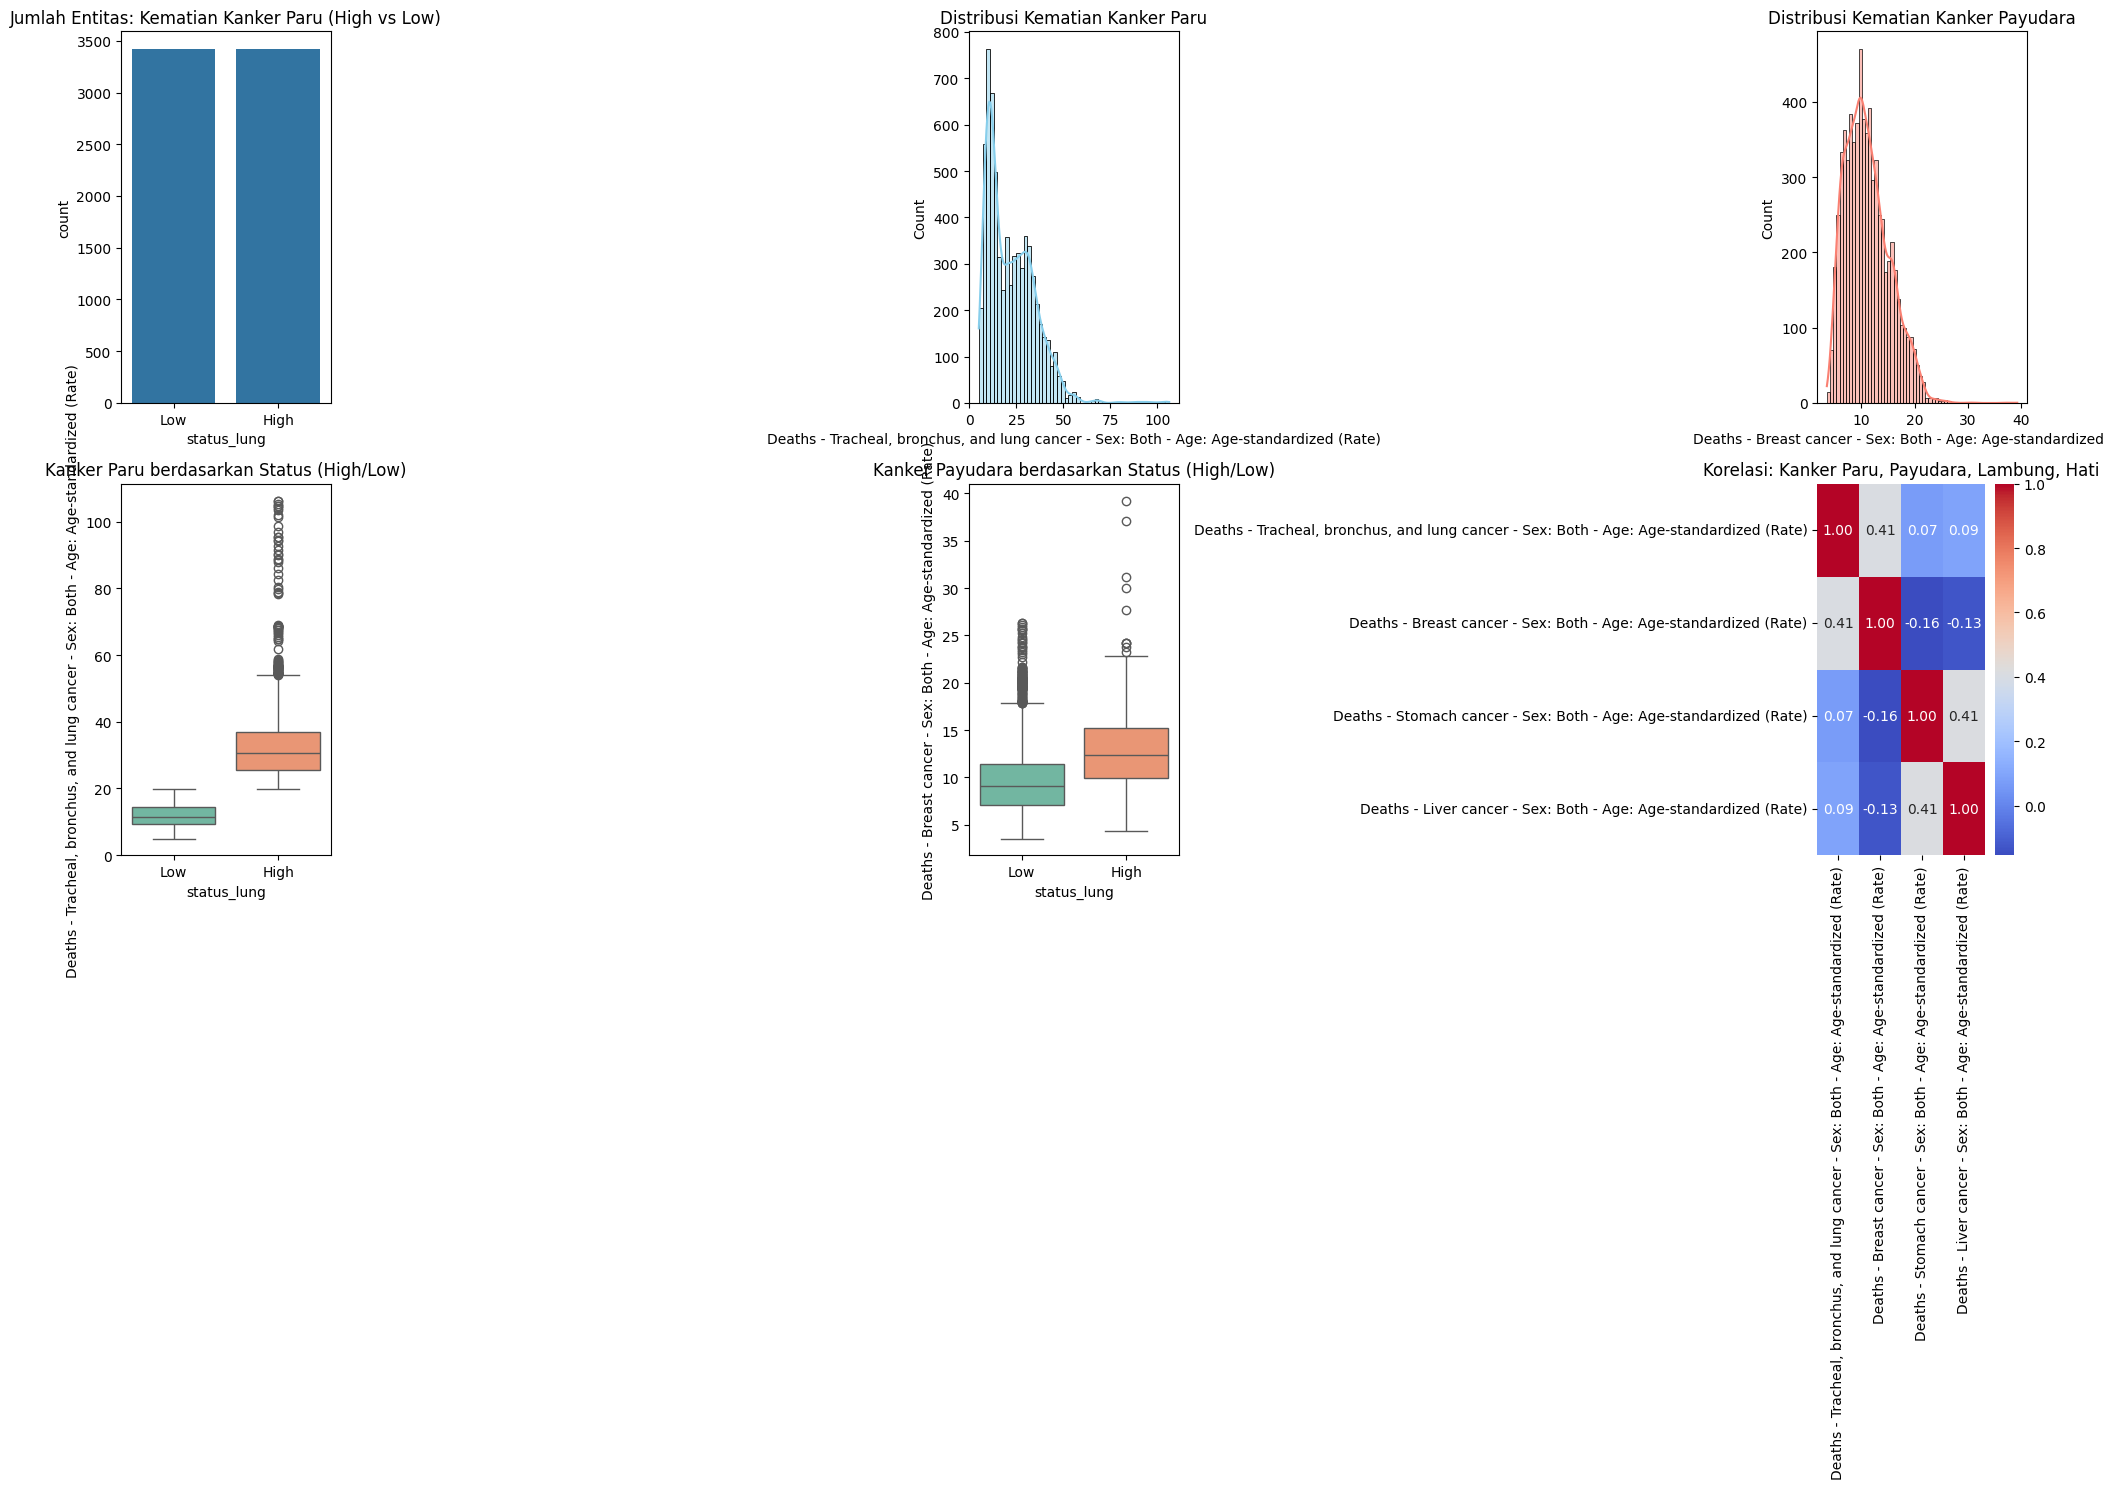

In [ ]:
# Siapkan subplot 2x3
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))
axes = axes.flatten()

# 1. Countplot: jumlah entitas berdasarkan status_lung
sns.countplot(x='status_lung', data=cancer_data, ax=axes[0])
axes[0].set_title('Jumlah Entitas: Kematian Kanker Paru (High vs Low)')

# 2. Histplot: distribusi kanker paru
sns.histplot(cancer_data[lung_col], kde=True, ax=axes[1], color='skyblue')
axes[1].set_title('Distribusi Kematian Kanker Paru')

# 3. Histplot: distribusi kanker payudara
sns.histplot(cancer_data[breast_col], kde=True, ax=axes[2], color='salmon')
axes[2].set_title('Distribusi Kematian Kanker Payudara')

# 4. Boxplot: kanker paru berdasarkan status_lung
sns.boxplot(x='status_lung', y=lung_col, data=cancer_data, ax=axes[3], palette='Set2')
axes[3].set_title('Kanker Paru berdasarkan Status (High/Low)')

# 5. Boxplot: kanker payudara berdasarkan status_lung
sns.boxplot(x='status_lung', y=breast_col, data=cancer_data, ax=axes[4], palette='Set2')
axes[4].set_title('Kanker Payudara berdasarkan Status (High/Low)')

# 6. Heatmap: korelasi antar 4 jenis kanker
corr_cols = [lung_col, breast_col, stomach_col, liver_col]
corr_data = cancer_data[corr_cols]
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[5])
axes[5].set_title('Korelasi: Kanker Paru, Payudara, Lambung, Hati')

plt.tight_layout()
plt.show()

In [ ]:
cancer_data['diagnosis'] = (cancer_data[lung_col] > cancer_data[lung_col].median()).astype(int)

In [ ]:
cancer_data.iloc[0:9]

,Entity,Code,Year,Deaths - Prostate cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Breast cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Uterine cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Bladder cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Cervical cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Kidney cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Stomach cancer - Sex: Both - Age: Age-standardized (Rate),...,Deaths - Lip and oral cavity cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Colon and rectum cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Gallbladder and biliary tract cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Liver cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Larynx cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Ovarian cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Thyroid cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Brain and central nervous system cancer - Sex: Both - Age: Age-standardized (Rate),status_lung,diagnosis
0,Afghanistan,AFG,1990,6.486764,7.310613,0.837238,4.285153,4.479875,0.826029,31.988172,...,1.273888,7.874312,2.611981,11.971836,3.621251,1.045087,0.795176,4.512770,Low,0
1,Afghanistan,AFG,1991,6.466813,7.288994,0.829514,4.233850,4.468688,0.804741,31.853999,...,1.257040,7.754987,2.590045,11.900918,3.589414,1.035561,0.789659,4.446988,Low,0
2,Afghanistan,AFG,1992,6.466158,7.299131,0.821847,4.192670,4.465265,0.785397,31.785219,...,1.244526,7.652136,2.573065,11.841933,3.570433,1.025213,0.784548,4.413799,Low,0
3,Afghanistan,AFG,1993,6.479348,7.381653,0.822471,4.166575,4.518657,0.777856,32.059246,...,1.240243,7.555002,2.578325,11.865807,3.593340,1.023647,0.788610,4.440347,Low,0
4,Afghanistan,AFG,1994,6.477914,7.473144,0.827221,4.140383,4.600542,0.772456,32.504461,...,1.236967,7.429222,2.593368,11.919348,3.632985,1.027381,0.796990,4.471324,Low,0
5,Afghanistan,AFG,1995,6.446085,7.511118,0.826968,4.118582,4.648066,0.763186,32.783406,...,1.227713,7.314547,2.595085,11.949510,3.648880,1.029252,0.801020,4.474024,Low,0
6,Afghanistan,AFG,1996,6.406307,7.540576,0.827682,4.090912,4.697553,0.755804,33.088726,...,1.217871,7.192590,2.597726,11.979859,3.666402,1.033894,0.805421,4.492872,Low,0
7,Afghanistan,AFG,1997,6.377823,7.589026,0.828031,4.060720,4.744999,0.751857,33.390628,...,1.210142,7.095220,2.602892,11.994605,3.685275,1.039084,0.810107,4.527542,Low,0
8,Afghanistan,AFG,1998,6.347122,7.647190,0.829496,4.031803,4.792422,0.748516,33.697938,...,1.202726,7.012412,2.610780,12.002823,3.701427,1.047105,0.815783,4.542042,Low,0


In [ ]:
lung_col = 'Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: Age-standardized (Rate)'
cancer_data['diagnosis'] = (cancer_data[lung_col] > cancer_data[lung_col].median()).astype(int)
Y = cancer_data['diagnosis']

In [ ]:
cancer_data['diagnosis'].unique()

array([0, 1])

In [ ]:
X = cancer_data.drop(['diagnosis', 'Entity', 'Code', 'Year'], axis=1)
X.head()

,Deaths - Prostate cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Breast cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Uterine cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Bladder cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Cervical cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Kidney cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Stomach cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Nasopharynx cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Testicular cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Other pharynx cancer - Sex: Both - Age: Age-standardized (Rate),...,"Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: Age-standardized (Rate)",Deaths - Lip and oral cavity cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Colon and rectum cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Gallbladder and biliary tract cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Liver cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Larynx cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Ovarian cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Thyroid cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Brain and central nervous system cancer - Sex: Both - Age: Age-standardized (Rate),status_lung
0,6.486764,7.310613,0.837238,4.285153,4.479875,0.826029,31.988172,0.852917,0.034325,0.509693,...,14.069657,1.273888,7.874312,2.611981,11.971836,3.621251,1.045087,0.795176,4.512770,Low
1,6.466813,7.288994,0.829514,4.233850,4.468688,0.804741,31.853999,0.844138,0.034032,0.502623,...,13.805590,1.257040,7.754987,2.590045,11.900918,3.589414,1.035561,0.789659,4.446988,Low
2,6.466158,7.299131,0.821847,4.192670,4.465265,0.785397,31.785219,0.837496,0.034161,0.496772,...,13.591141,1.244526,7.652136,2.573065,11.841933,3.570433,1.025213,0.784548,4.413799,Low
3,6.479348,7.381653,0.822471,4.166575,4.518657,0.777856,32.059246,0.838997,0.034576,0.493478,...,13.422799,1.240243,7.555002,2.578325,11.865807,3.593340,1.023647,0.788610,4.440347,Low
4,6.477914,7.473144,0.827221,4.140383,4.600542,0.772456,32.504461,0.843108,0.034790,0.490566,...,13.250556,1.236967,7.429222,2.593368,11.919348,3.632985,1.027381,0.796990,4.471324,Low


In [ ]:
from sklearn.preprocessing import StandardScaler

# Memisahkan fitur kategorikal dari fitur numerik
categorical_features = ['status_lung']
numerical_features = [col for col in X.columns if col not in categorical_features]

# Melakukan penskalaan hanya pada fitur numerik
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

X.head()

,Deaths - Prostate cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Breast cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Uterine cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Bladder cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Cervical cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Kidney cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Stomach cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Nasopharynx cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Testicular cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Other pharynx cancer - Sex: Both - Age: Age-standardized (Rate),...,"Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: Age-standardized (Rate)",Deaths - Lip and oral cavity cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Colon and rectum cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Gallbladder and biliary tract cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Liver cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Larynx cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Ovarian cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Thyroid cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Brain and central nervous system cancer - Sex: Both - Age: Age-standardized (Rate),status_lung
0,-0.639390,-0.937618,-0.961775,0.502118,-0.416749,-0.864900,2.490220,0.077636,-0.314853,-0.506845,...,-0.635091,-0.585778,-0.872071,0.413583,0.722847,1.827601,-1.101753,0.469657,1.026590,Low
1,-0.642234,-0.942906,-0.970980,0.472699,-0.418840,-0.880641,2.472360,0.067302,-0.315474,-0.515285,...,-0.655785,-0.595414,-0.891250,0.398613,0.714163,1.795755,-1.108742,0.452089,0.986009,Low
2,-0.642328,-0.940427,-0.980118,0.449085,-0.419480,-0.894945,2.463204,0.059484,-0.315199,-0.522270,...,-0.672591,-0.602571,-0.907782,0.387025,0.706940,1.776769,-1.116335,0.435811,0.965534,Low
3,-0.640447,-0.920239,-0.979375,0.434121,-0.409499,-0.900521,2.499681,0.061251,-0.314319,-0.526203,...,-0.685784,-0.605020,-0.923394,0.390615,0.709863,1.799682,-1.117484,0.448747,0.981912,Low
4,-0.640651,-0.897858,-0.973713,0.419101,-0.394191,-0.904514,2.558945,0.066091,-0.313866,-0.529679,...,-0.699283,-0.606894,-0.943611,0.400880,0.716420,1.839338,-1.114744,0.475435,1.001022,Low


In [ ]:
Y.head()

,diagnosis
0,0
1,0
2,0
3,0
4,0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2,
                                                    stratify=Y, # untuk data yang menyimpang
                                                    random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(6840, 23) (5472, 23) (1368, 23)


In [ ]:
# Make copies to avoid modifying original X_train and X_test directly if needed later
X_train_processed = X_train.copy()
X_test_processed = X_test.copy()

# Convert 'status_lung' column to numerical using mapping
# Assuming 'Low' maps to 0 and 'High' maps to 1
X_train_processed['status_lung'] = X_train_processed['status_lung'].map({'Low': 0, 'High': 1})
X_test_processed['status_lung'] = X_test_processed['status_lung'].map({'Low': 0, 'High': 1})

# Now, apply StandardScaler to the fully numerical dataframes
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_processed)
X_test_scaled = scaler.transform(X_test_processed)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, Y_train)

GaussianNB()

In [ ]:
# Accuracy
train_pred_nb = nb_model.predict(X_train_scaled)
test_pred_nb = nb_model.predict(X_test_scaled)

print("Training Accuracy (NB): ", accuracy_score (Y_train, train_pred_nb))
print("Testing Accuracy (NB): ", accuracy_score (Y_test, test_pred_nb))

Training Accuracy (NB):  1.0
Testing Accuracy (NB):  1.0


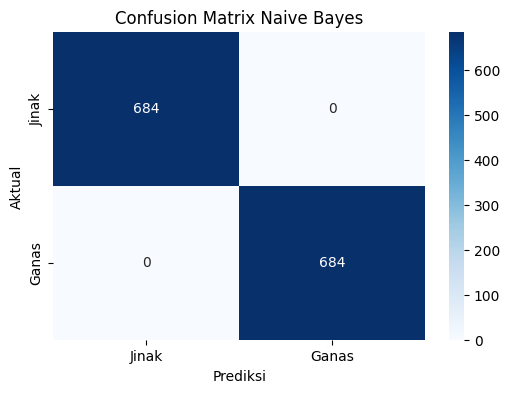

In [ ]:
plt.figure(figsize=(6,4))
cm_nb = confusion_matrix(Y_test, test_pred_nb)

sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Jinak', 'Ganas'],
            yticklabels=['Jinak', 'Ganas'])

plt.title("Confusion Matrix Naive Bayes")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

In [ ]:
print("\nClassification Report (NB):")
print(classification_report(Y_test, test_pred_nb))


Classification Report (NB):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       684
           1       1.00      1.00      1.00       684

    accuracy                           1.00      1368
   macro avg       1.00      1.00      1.00      1368
weighted avg       1.00      1.00      1.00      1368



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Convert 'status_lung' column in X to numerical using mapping
# Assuming 'Low' maps to 0 and 'High' maps to 1
X_encoded = X.copy()
X_encoded['status_lung'] = X_encoded['status_lung'].map({'Low': 0, 'High': 1})

pipeline_nb = Pipeline([
    ('scaler', StandardScaler()),
    ('nb', GaussianNB())
])

cv_scores = cross_val_score(pipeline_nb, X_encoded, Y, cv=5, scoring='accuracy')
print(cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Std Dev:", cv_scores.std())

[1. 1. 1. 1. 1.]
Mean Accuracy: 1.0
Std Dev: 0.0
